Retornos logaritmicos vs retornos simples

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-01-01"
df_stock = yf.download(ticker,start=start_date, end=end_date)[["Adj Close"]].rename(columns={"Adj Close": "adj_close"})
df_stock.head()

[*********************100%***********************]  1 of 1 completed


,adj_close
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980


<function matplotlib.pyplot.show(close=None, block=None)>

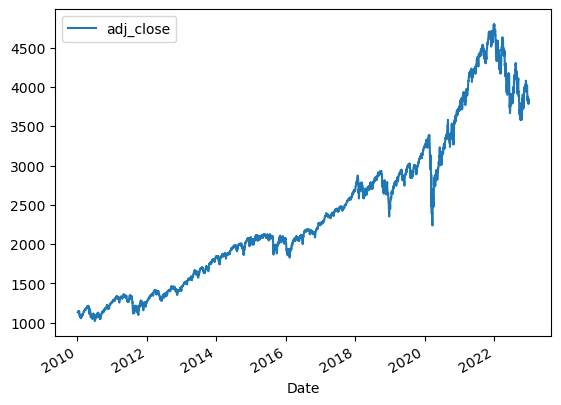

In [2]:
df_stock.plot() #Visualizar el activo
plt.show

In [3]:
#Calcular el retorno normal y el retorno logarítmico
df_stock['returns'] = df_stock['adj_close'].pct_change()
df_stock['log_returns'] = np.log(df_stock['adj_close'] / df_stock['adj_close'].shift(1))

#Es mucho mejor usar los retornos logaritmicos ya que el acumuluado se obtiene solo sumando y obtiene unos datos más limpios
#En el caso de los retonos no logaritmicos el acumulado se haría mediante el producto
#Ambos retornos pueden obtner gráficas parecidas pero no son iguales

<function matplotlib.pyplot.show(close=None, block=None)>

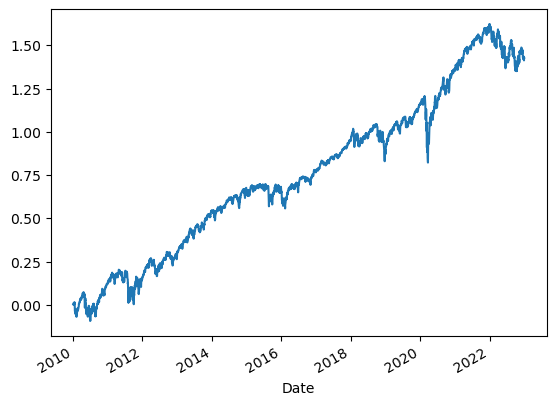

In [4]:
df_stock['returns'].cumsum().plot() # esto sería incorrecto
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

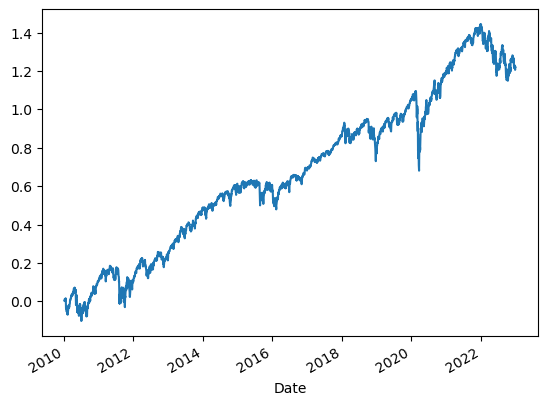

In [6]:
df_stock['log_returns'].cumsum().plot() # esto sería correcto
plt.show

Comprobación de porque los retornos no logaritmicos serían incorrectos

In [7]:
#Como se puede ver las graficas son parecidas pero no iguales
#En esta parte comprobaremos porque los retornos que no son logaritmicos serian incorrectos
df_stock['cumulative_returns'] = df_stock['returns'].cumsum()
df_stock['cumulative_log_returns'] = df_stock['log_returns'].cumsum()
df_stock.head()

,adj_close,returns,log_returns,cumulative_returns,cumulative_log_returns
Date,,,,,
2010-01-04,1132.989990,NaN,NaN,NaN,NaN
2010-01-05,1136.520020,0.003116,0.003111,0.003116,0.003111
2010-01-06,1137.140015,0.000546,0.000545,0.003661,0.003656
2010-01-07,1141.689941,0.004001,0.003993,0.007662,0.007649
2010-01-08,1144.979980,0.002882,0.002878,0.010544,0.010527


In [8]:
#Aquí se convierten los retornos acumulados en precios
df_stock['cumulative_prices_1'] = np.exp(df_stock['cumulative_returns'])
df_stock['cumulative_prices_1'] = df_stock['adj_close'][0] * df_stock['cumulative_prices_1']

In [9]:
df_stock['cumulative_prices_2'] = np.exp(df_stock['cumulative_log_returns'])
df_stock['cumulative_prices_2'] = df_stock['adj_close'].iloc[0] * df_stock['cumulative_prices_2']

In [10]:
df_stock.tail()

,adj_close,returns,log_returns,cumulative_returns,cumulative_log_returns,cumulative_prices_1,cumulative_prices_2
Date,,,,,,,
2022-12-23,3844.820068,0.005868,0.005851,1.428511,1.221867,4727.380076,3844.820068
2022-12-27,3829.250000,-0.004050,-0.004058,1.424461,1.217809,4708.274684,3829.250000
2022-12-28,3783.219971,-0.012021,-0.012093,1.412441,1.205715,4652.017021,3783.219971
2022-12-29,3849.280029,0.017461,0.017311,1.429902,1.223026,4733.960775,3849.280029
2022-12-30,3839.500000,-0.002541,-0.002544,1.427361,1.220482,4721.948266,3839.500000


Si nos fijamos en la tabla obtenida los valores de Cumulative_prices_1 ( que son los calculados sin usar logaritmo) no coinciden y son bastante superiores al precio de adj_close, lo que quiere decir que el calculo es incorrecto.
Por el contraio para Cumulative_price_2 que es el calculado logaritmicamente el precio coincide con el adj_close (precio de cierre) lo cual quiere decir que es correcto.

In [11]:
# Para calcular el retorno no logaritmico de forma correcta podríamos hacerlo de la siguiente forma
df_stock['cumulative_returns_1'] = ( 1 + df_stock['returns']).cumprod() - 1
df_stock['cumulative_prices_3'] = df_stock['adj_close'][0] * (1 + df_stock['cumulative_returns_1'])
df_stock.tail()

,adj_close,returns,log_returns,cumulative_returns,cumulative_log_returns,cumulative_prices_1,cumulative_prices_2,cumulative_returns_1,cumulative_prices_3
Date,,,,,,,,,
2022-12-23,3844.820068,0.005868,0.005851,1.428511,1.221867,4727.380076,3844.820068,2.393516,3844.820068
2022-12-27,3829.250000,-0.004050,-0.004058,1.424461,1.217809,4708.274684,3829.250000,2.379774,3829.250000
2022-12-28,3783.219971,-0.012021,-0.012093,1.412441,1.205715,4652.017021,3783.219971,2.339147,3783.219971
2022-12-29,3849.280029,0.017461,0.017311,1.429902,1.223026,4733.960775,3849.280029,2.397453,3849.280029
2022-12-30,3839.500000,-0.002541,-0.002544,1.427361,1.220482,4721.948266,3839.500000,2.388821,3839.500000


Si visualizamos de nuevo df_stock podemos ver que tenemos dos nuevas columnas una con el nuevo retorno acumuluado para el no logaritmico ya de forma correcta y luego la columna Cumulative_prices_3 que ya si que coincide con el adj_close, por que lo que ya si que sería correcto.

A la hora realizar análisis entre distintos activos se suele trabajar sobre los retornos puesto que estos nos dan un porcentaje o variación del activo. No se suele trabajar con precios porque resulta mucho más complicado y no es lo mismo comparar un activo con valor 50 que uno con valor 1000. Pero en cuanto a la cantidad de cambios o portentaje de cambio 'por así decirlo', si que serían comparables en cualquier caso. Es decir, si que se puede comparar un activo entre cualquier activo, su variación a lo largo del tiempo si es comparable, pero no es comparable directamente su precio, sino esa cantidad de variación en el tiempo.

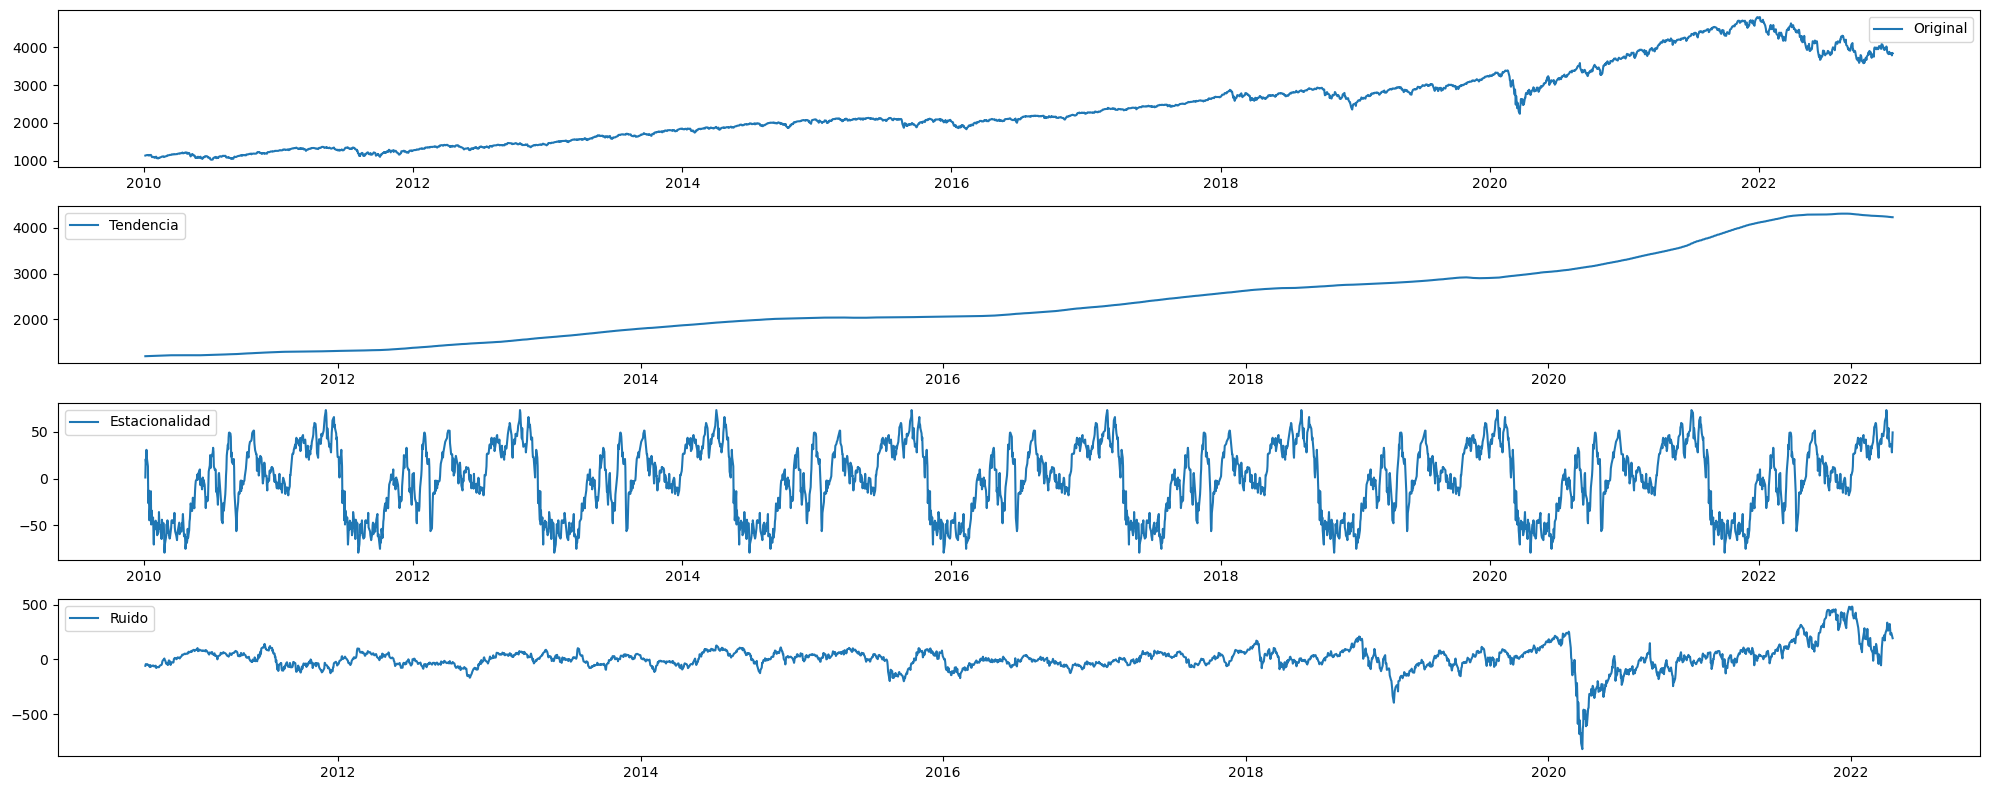

In [13]:
#Primero analizamos brevemente la grafica de los precios

decomposition = seasonal_decompose(df_stock['adj_close'], model='additive', period=365) 
#Descompone la serie de tiempo en tres gráficas diferentes que nos indican la tendencia, la estacionalidad y el ruido.
#Vemos que a la función se le pasa los precios de cierre.
#En el campo model se le puede indicar additive o multiplicative. 
#Additive se le suele indicar en caso de que la tendencia sea lineal y no tenga valores negativos.
#El multiplicativo se aplica cuando los valores crecen o decrecen de forma exponencial y tampoco son negativos.
#En periodo se indica cada cuanto tiempo queremos encontrar patrones, por asi decirlo.

#Los atributos que devuelve seasonal_descompose y que hemos almacenado en decomposition son:
tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
ruido = decomposition.resid

#Para visualizar las graficas
plt.figure(figsize=(20,8))
plt.subplot(411)
plt.plot(df_stock['adj_close'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ruido, label='Ruido')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


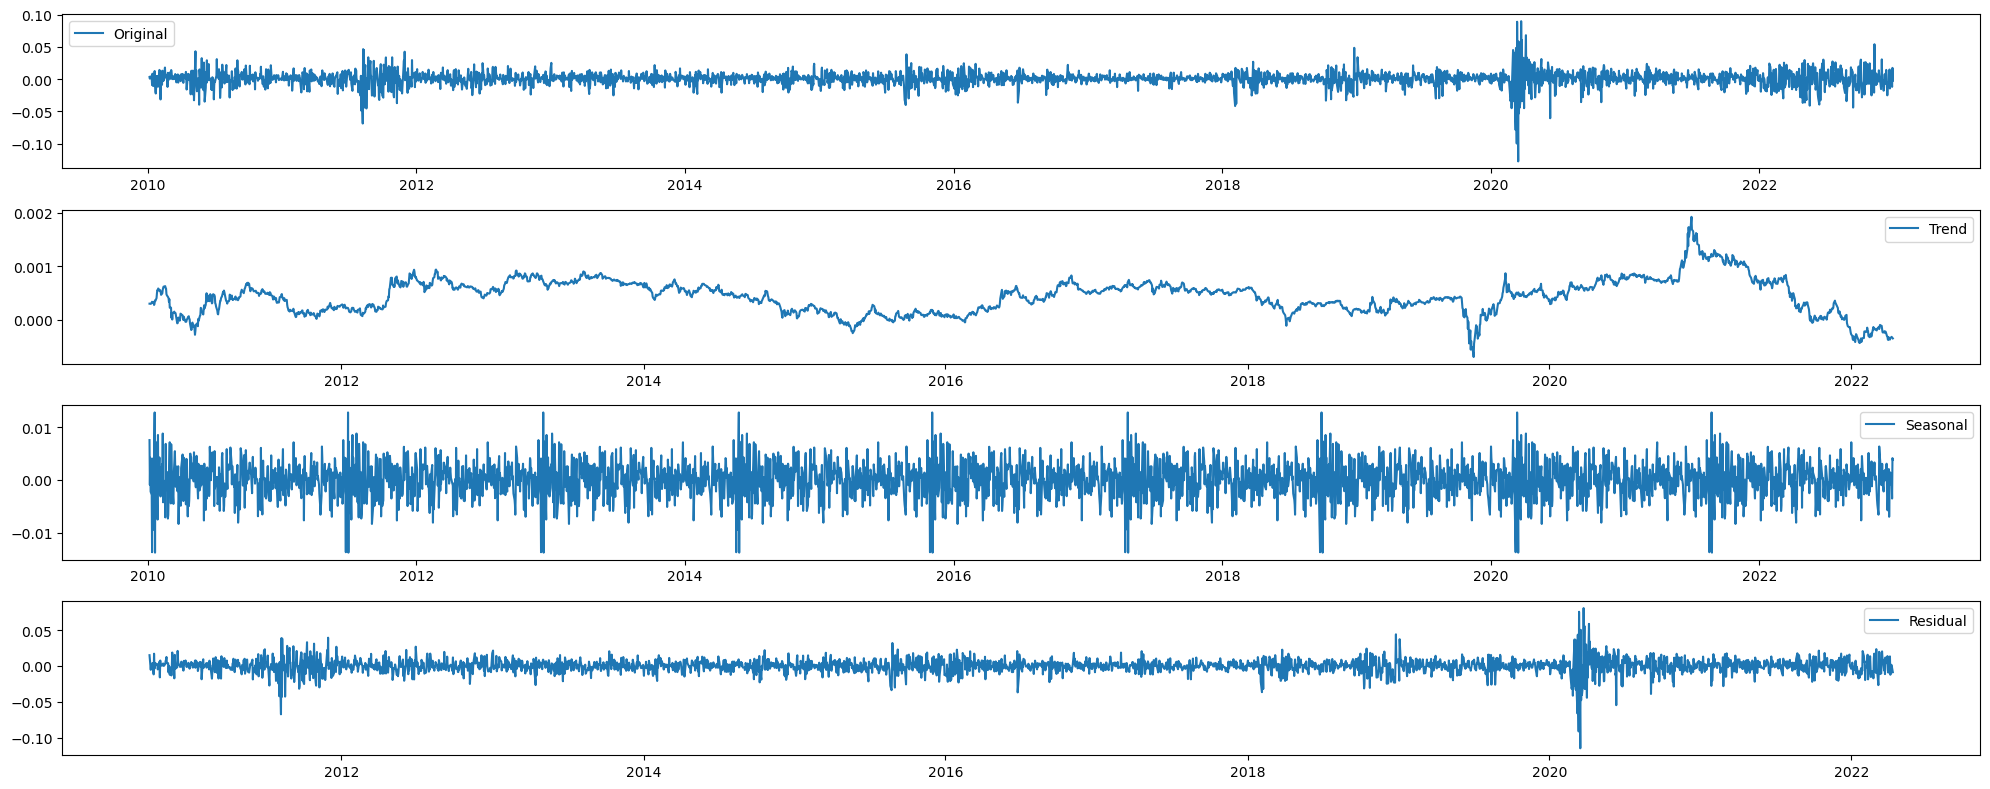

In [19]:
#Ahora hacemos lo mismo con los retornos

df_stock.dropna(inplace=True)#eliminar valores nulos
returns_decomposition = seasonal_decompose(df_stock['log_returns'], model='additive', period=365)

trend = returns_decomposition.trend
seasonal = returns_decomposition.seasonal
residual = returns_decomposition.resid

#Para visualizar las graficas
plt.figure(figsize=(20,8))
plt.subplot(411)
plt.plot(df_stock['log_returns'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
